In [ ]:
import tensorflow

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.layers import Input, Dense, Embedding, Conv1D, GlobalMaxPool1D, MaxPooling1D
from tensorflow.keras.models import Model

from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("dark_background")

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/spam.csv

File ‘spam.csv’ already there; not retrieving.



In [ ]:
df = pd.read_csv("spam.csv", encoding="ISO-8859-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df = df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"])
df.columns = ["labels", "texts"]

In [ ]:
df

,labels,texts
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df["labels"] = df["labels"].map({"ham":0, "spam":1})
df.head()

,labels,texts
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
Y = df["labels"].values
df_train, df_test, y_train, y_test = train_test_split(df["texts"], Y, test_size=0.33)

In [ ]:
df_train.shape

(3733,)

In [ ]:
df_test.shape

(1839,)

In [ ]:
MAX_VOCAB_NUM = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_NUM)
tokenizer.fit_on_texts(df_train)
seq_train = tokenizer.texts_to_sequences(df_train)
seq_test = tokenizer.texts_to_sequences(df_test)

In [ ]:
data_train = pad_sequences(seq_train)
data_train.shape

(3733, 189)

In [ ]:
T = data_train.shape[1]
data_test = pad_sequences(seq_test, maxlen=T)

In [ ]:
word2idx = tokenizer.word_index
word2idx

{'i': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'the': 5,
 'u': 6,
 'and': 7,
 'in': 8,
 'is': 9,
 'me': 10,
 'my': 11,
 'your': 12,
 'for': 13,
 'it': 14,
 'call': 15,
 'of': 16,
 'have': 17,
 'on': 18,
 '2': 19,
 'now': 20,
 'that': 21,
 'are': 22,
 'so': 23,
 'not': 24,
 'or': 25,
 'but': 26,
 'can': 27,
 'do': 28,
 'at': 29,
 'if': 30,
 'get': 31,
 'will': 32,
 'be': 33,
 'no': 34,
 "i'm": 35,
 'with': 36,
 'ur': 37,
 'just': 38,
 'we': 39,
 'this': 40,
 '4': 41,
 'up': 42,
 'lt': 43,
 'out': 44,
 'gt': 45,
 'from': 46,
 'go': 47,
 'what': 48,
 'how': 49,
 'when': 50,
 'free': 51,
 'all': 52,
 'ok': 53,
 'like': 54,
 'know': 55,
 'then': 56,
 'good': 57,
 'was': 58,
 'time': 59,
 'come': 60,
 'got': 61,
 'day': 62,
 'am': 63,
 'its': 64,
 'only': 65,
 'as': 66,
 'text': 67,
 'there': 68,
 'send': 69,
 'he': 70,
 'want': 71,
 'one': 72,
 'by': 73,
 'love': 74,
 'txt': 75,
 'going': 76,
 'lor': 77,
 'r': 78,
 'sorry': 79,
 'n': 80,
 "i'll": 81,
 'da': 82,
 'tell': 83,
 'see': 84,
 'home': 85

In [ ]:
V = len(word2idx) # V is number of unique words

In [ ]:
i = Input(shape=(T,))
x = Embedding(V+1, 20)(i) # since indexing starts 1 instead of 0 we added 1 to V.
x = Conv1D(32, 3, padding="same", activation="relu", strides=2)(x)
# x = MaxPooling1D(3)(x)
x = Conv1D(64, 3, padding="same", activation="relu", strides=2)(x)
# x = MaxPooling1D(3)(x)
x = Conv1D(128, 3, padding="same", activation="relu", strides=2)(x)
x = GlobalMaxPool1D()(x)

x = Dense(1, activation="sigmoid")(x)

model = Model(i, x)
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 189)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_6 (Embedding)              │ (None, 189, 20)             │         145,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_13 (Conv1D)                   │ (None, 95, 32)              │           1,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_14 (Conv1D)                   │ (None, 48, 64)              │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_15 (Conv1D)                   │ (None, 24, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_4               │ (None, 128)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,553 (697.47 KB)

 Trainable params: 178,553 (697.47 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["acc"])

hist = model.fit(data_train, y_train,
          validation_data=(data_test, y_test),
          epochs=5)

Epoch 1/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - acc: 0.8312 - loss: 0.4677 - val_acc: 0.8744 - val_loss: 0.2373
Epoch 2/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - acc: 0.9229 - loss: 0.1608 - val_acc: 0.9744 - val_loss: 0.0838
Epoch 3/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - acc: 0.9941 - loss: 0.0187 - val_acc: 0.9782 - val_loss: 0.0777
Epoch 4/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - acc: 0.9997 - loss: 0.0030 - val_acc: 0.9772 - val_loss: 0.0833
Epoch 5/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - acc: 1.0000 - loss: 7.6261e-04 - val_acc: 0.9772 - val_loss: 0.0863


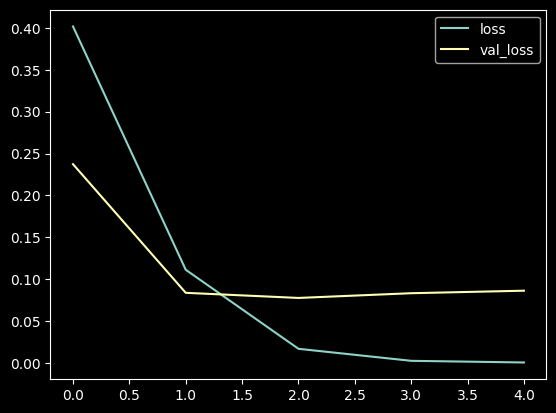

In [ ]:
plt.plot(hist.history["loss"], label="loss")
plt.plot(hist.history["val_loss"], label="val_loss")
plt.legend()

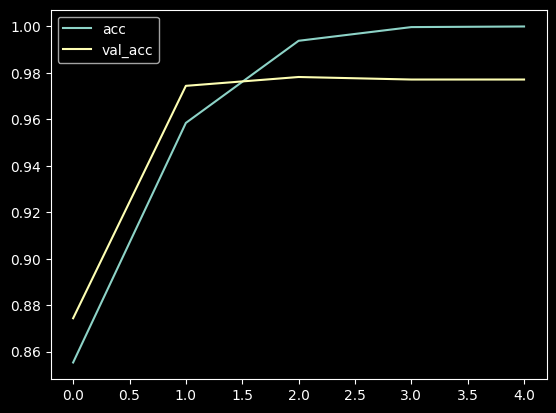

In [ ]:
plt.plot(hist.history["acc"], label="acc")
plt.plot(hist.history["val_acc"], label="val_acc")
plt.legend()